# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hotan
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kuanda
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | nagqu
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | cacahoatan
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | gobabis
Processing Record 14 of Set 1 | wewak
Processing Record 15 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 16 of Set 1 | pimentel
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | inhambane
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | waitangi
Processing Record 22 o

Processing Record 40 of Set 4 | pontianak
Processing Record 41 of Set 4 | conde
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | qusmuryn
Processing Record 44 of Set 4 | tromso
Processing Record 45 of Set 4 | kavaratti
Processing Record 46 of Set 4 | salacgriva
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | tagta
Processing Record 49 of Set 4 | upata
Processing Record 0 of Set 5 | pariaman
Processing Record 1 of Set 5 | melfort
Processing Record 2 of Set 5 | kangding
Processing Record 3 of Set 5 | whakatane
Processing Record 4 of Set 5 | brant
Processing Record 5 of Set 5 | lihue
Processing Record 6 of Set 5 | nizhneudinsk
Processing Record 7 of Set 5 | burutu
Processing Record 8 of Set 5 | spalding
Processing Record 9 of Set 5 | gadzhiyevo
Processing Record 10 of Set 5 | flying fish cove
Processing Record 11 of Set 5 | ballina
Processing Record 12 of Set 5 | laayoune
Processing Record 13 of Set 5 | callao
Processing Record 14 of Set 5 | vung

Processing Record 32 of Set 8 | kone
Processing Record 33 of Set 8 | uhrichsville
Processing Record 34 of Set 8 | ciudad lazaro cardenas
Processing Record 35 of Set 8 | ulsteinvik
Processing Record 36 of Set 8 | pangai
Processing Record 37 of Set 8 | yakeshi
Processing Record 38 of Set 8 | yorkton
Processing Record 39 of Set 8 | acarau
Processing Record 40 of Set 8 | miguel ahumada
Processing Record 41 of Set 8 | cadale
Processing Record 42 of Set 8 | abong mbang
Processing Record 43 of Set 8 | umm qasr
Processing Record 44 of Set 8 | firuzabad
Processing Record 45 of Set 8 | lospalos
Processing Record 46 of Set 8 | muriti
Processing Record 47 of Set 8 | mount isa
Processing Record 48 of Set 8 | beaufort
Processing Record 49 of Set 8 | kapuskasing
Processing Record 0 of Set 9 | sokcho
Processing Record 1 of Set 9 | ocean city
Processing Record 2 of Set 9 | qui nhon
Processing Record 3 of Set 9 | pangody
Processing Record 4 of Set 9 | mramani
Processing Record 5 of Set 9 | vasteras
Proc

Processing Record 22 of Set 12 | gebeit
Processing Record 23 of Set 12 | la passe
Processing Record 24 of Set 12 | panaba
Processing Record 25 of Set 12 | la'ie
Processing Record 26 of Set 12 | coahuayana de hidalgo
Processing Record 27 of Set 12 | hurghada
Processing Record 28 of Set 12 | ribadeo
Processing Record 29 of Set 12 | la libertad
Processing Record 30 of Set 12 | at taj
Processing Record 31 of Set 12 | bologoye
Processing Record 32 of Set 12 | tarija
Processing Record 33 of Set 12 | cheria
Processing Record 34 of Set 12 | kollo
Processing Record 35 of Set 12 | port hueneme
Processing Record 36 of Set 12 | bejubang dua
City not found. Skipping...
Processing Record 37 of Set 12 | padangsidempuan
Processing Record 38 of Set 12 | jandiala guru
Processing Record 39 of Set 12 | san cristobal
Processing Record 40 of Set 12 | sungai penuh
Processing Record 41 of Set 12 | papao
Processing Record 42 of Set 12 | magadan
Processing Record 43 of Set 12 | trapani
Processing Record 44 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,4.70,56,75,4.12,US,1704402503
1,hotan,37.0997,79.9269,-3.80,51,2,0.22,CN,1704402507
2,ushuaia,-54.8000,-68.3000,7.92,96,100,1.32,AR,1704402507
3,kuanda,56.3161,116.0806,-19.96,99,100,1.31,RU,1704402508
4,adamstown,-25.0660,-130.1015,23.67,82,91,6.48,PN,1704402508


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,4.70,56,75,4.12,US,1704402503
1,hotan,37.0997,79.9269,-3.80,51,2,0.22,CN,1704402507
2,ushuaia,-54.8000,-68.3000,7.92,96,100,1.32,AR,1704402507
3,kuanda,56.3161,116.0806,-19.96,99,100,1.31,RU,1704402508
4,adamstown,-25.0660,-130.1015,23.67,82,91,6.48,PN,1704402508


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

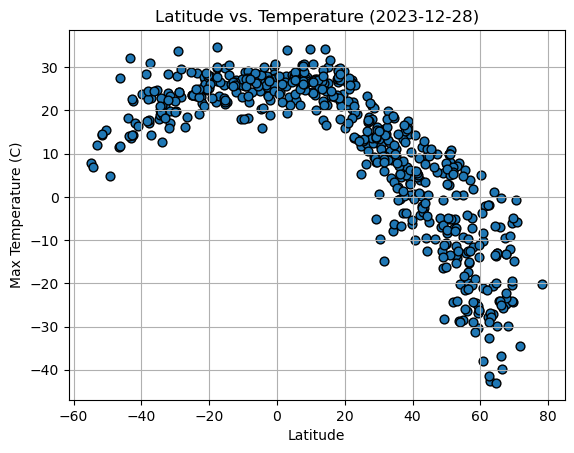

In [11]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
Fig1 = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Max Temperature (C)", title="Latitude vs. Temperature (2023-12-28)")            

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

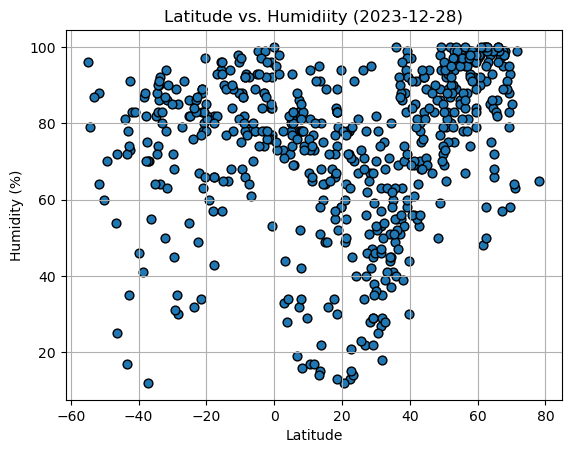

In [12]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
Fig2 = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Humidity (%)", title="Latitude vs. Humidiity (2023-12-28)")            


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

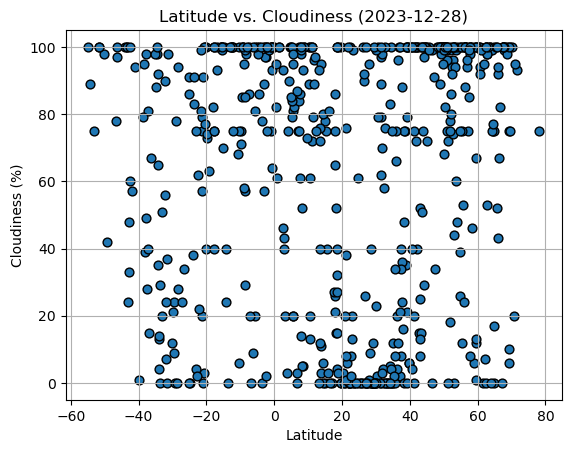

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
Fig3 = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Cloudiness (%)", title="Latitude vs. Cloudiness (2023-12-28)")            


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

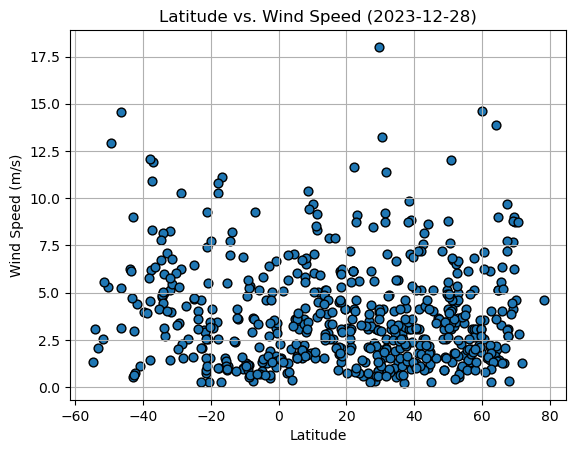

In [14]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
Fig4 = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Wind Speed (m/s)", title="Latitude vs. Wind Speed (2023-12-28)")            


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,4.70,56,75,4.12,US,1704402503
1,hotan,37.0997,79.9269,-3.80,51,2,0.22,CN,1704402507
3,kuanda,56.3161,116.0806,-19.96,99,100,1.31,RU,1704402508
5,nagqu,31.5000,92.0000,-14.85,57,79,1.59,CN,1704402508
7,cacahoatan,14.9833,-92.1667,30.11,49,78,3.36,MX,1704402509


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,7.92,96,100,1.32,AR,1704402507
4,adamstown,-25.0660,-130.1015,23.67,82,91,6.48,PN,1704402508
6,margaret river,-33.9500,115.0667,12.70,86,13,4.98,AU,1704402508
10,port lincoln,-34.7333,135.8667,17.98,82,88,6.71,AU,1704402510
11,port-aux-francais,-49.3500,70.2167,4.77,70,42,12.92,TF,1704402510


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8781776656645812


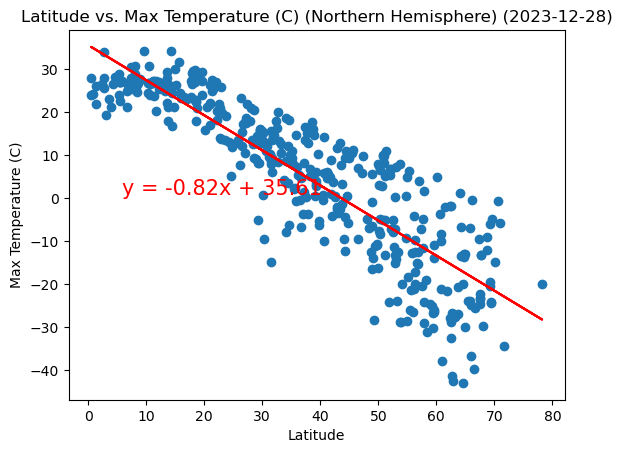

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Latitude vs. Max Temperature (C) (Northern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5911910359465624


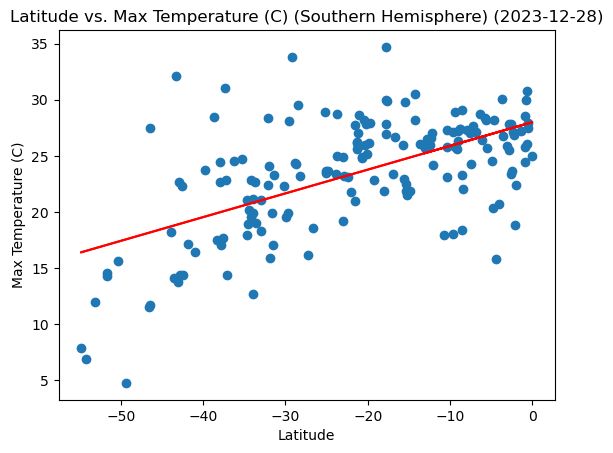

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Latitude vs. Max Temperature (C) (Southern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The latitude has a strong correlation with Max Temperature (C) as the r-value of the northern hemisphere is -0.77 while the r-value of the southern hempisphere is 0.82.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4437493790295551


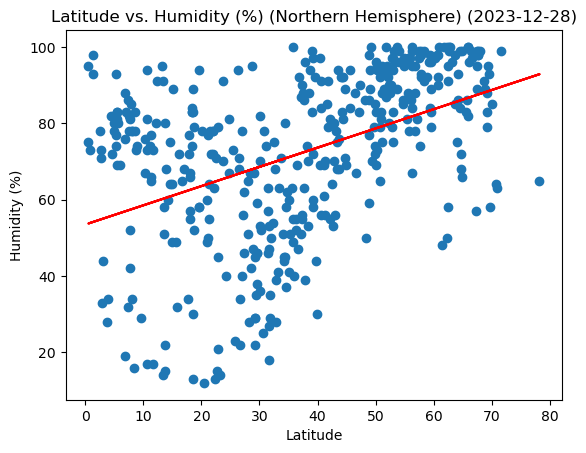

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (%) (Northern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.3041680278016444


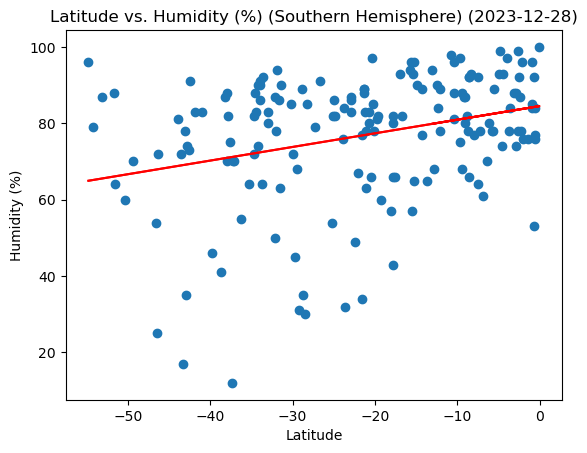

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (%) (Southern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The data shows that latitude has very little affect on humidity as both r-values are very close to zero, whcih means there is no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23841315923541834


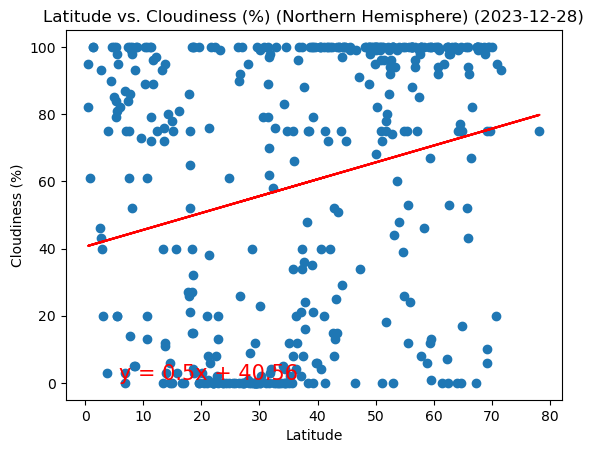

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (%) (Northern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.1906070016738732


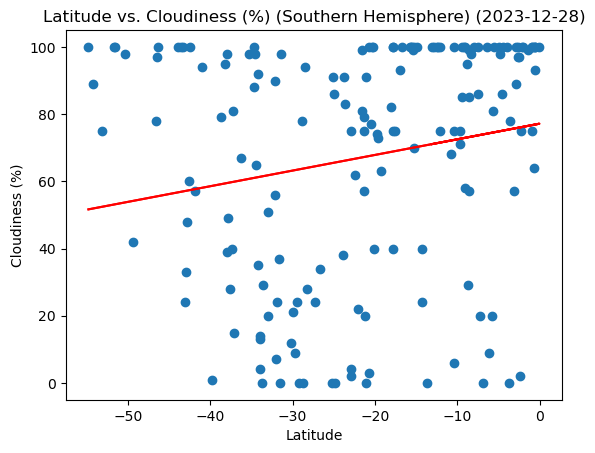

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (%) (Southern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The data shows that latitude has very little affect on cloudiness as bother r-values are very close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.010009947695071386


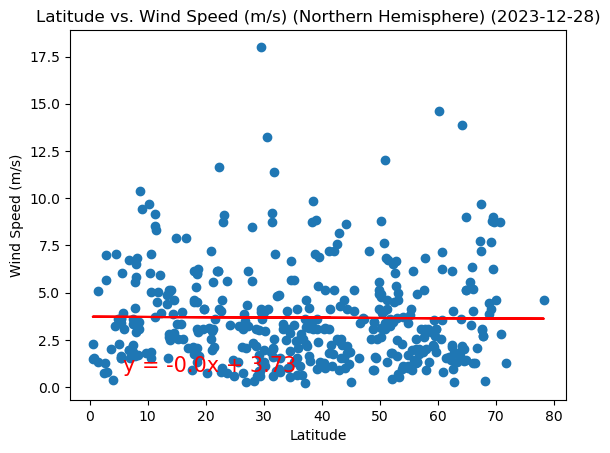

In [27]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Latitude vs. Wind Speed (m/s) (Northern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.33328817053946286


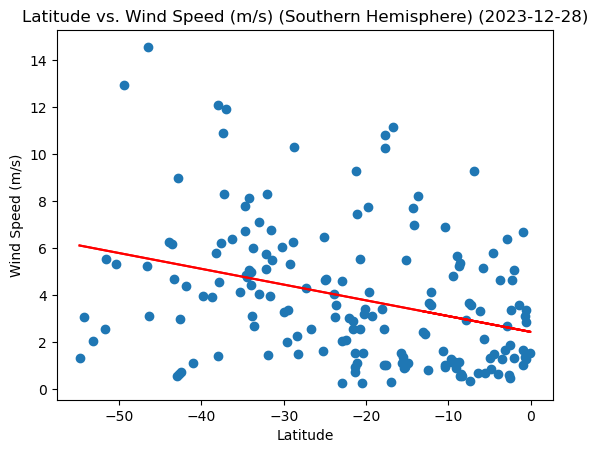

In [28]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Latitude vs. Wind Speed (m/s) (Southern Hemisphere) (2023-12-28)")
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** the data shows that latitude has very little affect on wind speed as both r-values are close to zero.